In [44]:
#! /usr/bin/env python

###############################################################################
# forrest_2mode_sensplot.py
#
# Demonstrating the approximation of the 2-mode sensplot
#
# NOTE: Any plotting is set up for output, not viewing on screen.
#       So, it will likely be ugly on screen. The saved PDFs should look
#       better.
#
# Created: 04/12/16
#   - Joshua Vaughan
#   - joshua.vaughan@louisiana.edu
#   - http://www.ucs.louisiana.edu/~jev9637
#
# Modified:
#   *
#
###############################################################################

import numpy as np
import matplotlib
# matplotlib.use('GTKAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import InputShaping as shaping

zv = shaping.ZV(0.5, 0.0)
ei = shaping.EI(0.4310, 0.0)
zvei = shaping.ZV_EI_2mode(0.25,0.017,0.48,0.204)

freq1, mag1 = shaping.sensplot(zv.shaper, 0, 1, 0.017)
freq2, mag2 = shaping.sensplot(ei.shaper, 0, 1, 0.0)
freq3, mag3 = shaping.sensplot(zvei.shaper, 0, 1, 0.1)

/Users/forrest/Documents/CRAWLAB-Student-Code/Forrest Montgomery/CDPM/InputShaping.py:1151: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dseq = np.zeros((round(seq[-1,0]/step)+2,1))
/Users/forrest/Documents/CRAWLAB-Student-Code/Forrest Montgomery/CDPM/InputShaping.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dseq[index+1] = dseq[index+1] + woof*seq[nn,1]
/Users/forrest/Documents/CRAWLAB-Student-Code/Forrest Montgomery/CDPM/InputShaping.py:1157: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dseq[index] = dseq[index]+seq[nn,1] - woof*seq[nn,1]


(array([ 861,  862,  863, 1138, 1139]), array([0, 0, 0, 0, 0]))

In [45]:
ei.shaper

array([[ 0.0000,  0.2622],
       [ 1.1599,  0.4756],
       [ 2.3202,  0.2622]])

In [2]:
mag3 = mag1 * mag2

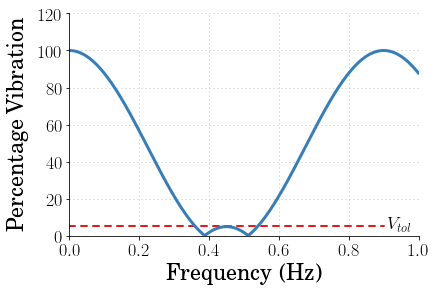

In [3]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (Hz)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Percentage Vibration', fontsize=22, weight='bold', labelpad=10)

# plt.plot(freq1, mag1*mag2*100, linewidth=3, linestyle='-', label=r'ZV-EI')
# plt.plot(freq1, mag1*100, linewidth=3, linestyle='-.', label=r'ZV')

plt.plot([0, 0.9], [5,5], linewidth = 2, linestyle = '--')
plt.text(0.91, 2, r'$V_{tol}$', fontsize=18)
# plt.plot(freq1, mag1*100, linewidth=3, linestyle='-.', label=r'ZV', color='#e41a1c')
plt.plot(freq2, mag2*100, linewidth=3, linestyle='-', label=r'EI',color='#377eb8')
# plt.plot(freq3, mag3*100, linewidth=3, linestyle='-', label=r'ZV-EI',color='#4daf4a')
# plt.plot([0.25, 0.25], [0,60], linewidth = 2, linestyle = '--',color='black')
# plt.text(0.25, 70, 'Low\nMode', fontsize=15, horizontalalignment='center',
#         verticalalignment='center')

# plt.plot([0.48, 0.48], [0,60], linewidth = 2, linestyle = '--',color='black')
# plt.text(0.5, 70, 'Middle\nMode', fontsize=15, horizontalalignment='center',
#         verticalalignment='center')

# plt.plot([0.78, 0.78], [0,60], linewidth = 2, linestyle = '--',color='black')
# plt.text(0.78, 70, 'High\nMode', fontsize=15, horizontalalignment='center',
#         verticalalignment='center')

# uncomment below and set limits if needed
plt.xlim(0,1)
plt.ylim(0,120)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=15)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('/Users/forrest/Desktop/EI.pdf')

# show the figure
plt.show()

In [20]:
shaper_times = np.array([[0],
                         [np.pi],
                        [2*np.pi]])

shaper_impulses = np.array([[0.25],
                            [0.5],
                            [0.25]])
Shaper = np.hstack((shaper_times, shaper_impulses))
Shaper

array([[ 0.0000,  0.2500],
       [ 3.1416,  0.5000],
       [ 6.2832,  0.2500]])

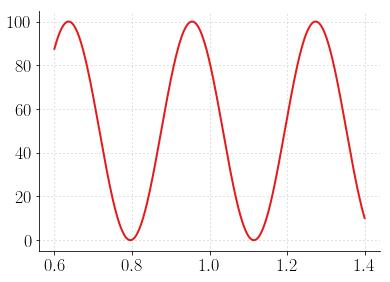

In [21]:
freq, mag = shaping.sensplot(Shaper, 0.6, 1.4, 0.0)
plt.plot(freq,mag*100)